**Summary**
In this Notebook, I finetune GPT-2 on "Arabic" Quotes dataset using gpt-2" library.

**Dataset** : Quotes-500k

**Goal** : is to Generate Arabic Quotes from trained Language Model.

**BrainStorming Steps**


1.   Importing data & pre-processing
2.   Preparing the dataset
3.   finetune GPT-2 model
4.   generate quotes
5.   evaluation





# 1.   Importing Data & Preprocessing


Prepare the dataset and build a TextDataset

In [ ]:
import pandas as pd

In [ ]:
data= pd.read_csv('/content/complete_arabic_quotes.csv')

Exploring dataset

In [ ]:
data.shape

(90000, 2)

In [ ]:
data.sample(5)

,quote,tag
29307,الطريق إلى النجاح مليء بالعديد من أماكن وقوف السيارات المغرية.,النجاح
44521,نحن بحاجة إلى أن نعيش تجربتنا كما هي وأعيننا مفتوحة. الكون هو ما هو عليه ، سواء أحببنا ذلك أم لا.,خبرة
7238,ما يدور في ذهني هو نوع من Chautauqua ... هذا هو الاسم الوحيد الذي يمكنني التفكير فيه ... مثل عرض الخيمة المتنقل Chautauquas الذي كان يتنقل عبر أمر...,ملهم
73700,الفتيات سوف يجتمعن فقط للالتقاء. الرجال بحاجة إلى نشاط كعذر. وإلا فإنه من الشائع جدًا أن يتعاملوا معه.,أولاد
85189,يمكنك أن تقرأ كلمة الله ، ولكن بدون وساطة وصلاة ، نصبح ضعفاء روحيًا وغير ممتلئين.,محنة


In [ ]:
# we will create a simple text generator not based on a any other feature
#we don't need the tag
data = data.drop('tag', axis=1)

In [ ]:
# studing the length of each input
length = []
for index, row in data.iterrows():   
    l = len (row['quote'])
    length.append(l)

In [ ]:
len(length)

90000

In [ ]:
data["quote-len"]=length

In [ ]:
data.sample(5)

,quote,quote-len
61126,لكن الله بين محبته لنا ، لأنه ونحن بعد خطاة مات المسيح لأجلنا. رومية 5: 8,73
10726,لا تكن حكيما بأعينك. اطلبوا طرق الله.,37
51192,لا تكذب لحماية مشاعري. أفضل أن تقول الحقيقة بمحبة واحترام. سأكون بخير!,70
49784,المطر ليس تغيرًا موسميًا ، إنه شعور يعيد الذكريات!,50
66879,إذا لم يستطع المرء الاستمتاع بقراءة كتاب مرارًا وتكرارًا ، فلا فائدة من قراءته على الإطلاق.,91


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


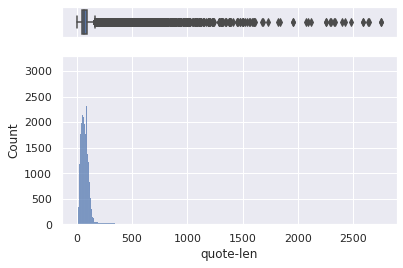

In [ ]:
sns.set(style="darkgrid")
 
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# assigning a graph to each ax
sns.boxplot(data["quote-len"], ax=ax_box)
sns.histplot(data=data, x="quote-len", ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

we will set the max_length=150, each quote longer that 150 will be deleted

In [ ]:
max_length = 150

In [ ]:
quote_list = data.values.tolist()

In [ ]:
for elm in quote_list:
    if elm[1]> max_length:
     quote_list.remove(elm)

In [ ]:
data = pd.DataFrame(quote_list, columns = ['text', 'leng'])

In [ ]:
data.head()

,text,leng
0,يجب أن ترقص كما لو أنه لا يوجد أحد يشاهد ، أحب كما لو أنك لن تتأذى أبدًا ، وغني كأن لا أحد يستمع ، وعيش كما لو كانت جنة على الأرض.,130
1,أنت تعلم أنك في حالة حب عندما لا تستطيع النوم لأن الواقع في النهاية أفضل من أحلامك.,83
2,الصديق هو الشخص الذي يعرف كل شيء عنك ولا يزال يحبك.,51
3,لا يمكن للظلام أن يطرد الظلام: النور وحده قادر على فعل ذلك. لا يمكن للكراهية أن تطرد الكراهية: الحب وحده هو الذي يفعل ذلك.,122
4,نقبل الحب الذي نظن اننا نستحقه.,31


In [ ]:
data.shape

(86242, 2)

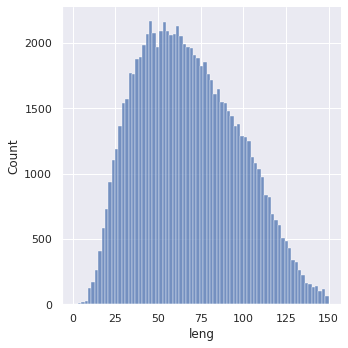

In [ ]:
sns.displot(data, x="leng")

In [ ]:
pd.options.display.max_colwidth = 150

In [ ]:
data.sample(5)

,text,leng
55196,معرفة الكتاب تتخذ إجراءات بناءً على الأسباب,43
22728,حتى الآن ، أتساءل عن مدى اقتناع حياتي.,38
52427,ابتسامة طفل توسع الكون (D'un enfant le sourire - Agrandit l'univers),68
78686,"القول المأثور ""إذا كنت تريد القيام بشيء ما ، اسأل امرأة مشغولة"" هو اعتراف مباشر بالأبوة في معسكر التدريب على الكفاءة.",117
53500,بنفس الدرجة التي يصبح فيها فهمك لأفريكا وموقفك تجاهها أكثر إيجابية ، سيصبح فهمك وموقفك تجاه نفسك أكثر إيجابية أيضًا ...,119


Preparing data for model fine-tuning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data,test_size=0.15, shuffle=True)

In [ ]:
train.shape

(73305, 2)

In [ ]:
train.columns

Index(['text', 'leng'], dtype='object')

In [ ]:
test.shape

(12937, 2)

dropping len column

In [ ]:
train = train.drop('leng', axis=1)

In [ ]:
test = test.drop('leng', axis=1)

saving a text file for our datasets

In [ ]:
train.to_csv(r'train_dataset.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
test.to_csv(r'test_dataset.txt', header=None, index=None, sep=' ', mode='a')

In [ ]:
train.head(3)

,text
85779,"في السياسة البناءة ، هناك ""ضبط في كل مكان"" وفي سياسة هدامة ، هناك سياسة عدم العدالة."
32744,كلما علمت شعبك ألا يحتاج إليك ، زادت قيمتك.
10715,فالأفضل أن تبقى صامتًا لخطر الاعتقاد بأنك أحمق ، من أن تتكلم وتزيل كل شك في ذلك.


Now we can build our TextDataset( custom implementation of the Pytroch Dataset class implemented by the transformers library). Therefore we create a TextDataset instance with the tokenizer and the path to our datasets. We also create our data_collator, which is used in training to form a batch from our dataset.

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("aubmindlab/aragpt2-base")

train_path = '/content/train_dataset.txt'
test_path = '/content/test_dataset.txt'

Downloading:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.50M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.52M [00:00<?, ?B/s]

In [ ]:
from transformers import TextDataset,DataCollatorForLanguageModeling

In [ ]:

def load_dataset(train_path,test_path,tokenizer):
    train_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=train_path,
          block_size=128)

    test_dataset = TextDataset(
          tokenizer=tokenizer,
          file_path=test_path,
          block_size=128)

    data_collator = DataCollatorForLanguageModeling(
        tokenizer=tokenizer, mlm=False,
    )
    return train_dataset,test_dataset,data_collator


A DataCollator is a function that takes a list of samples from a Dataset and collate them into a batch, as a dictionary. of PyTorch/TensorFlow tensors or NumPy arrays.

In [ ]:
train_dataset,test_dataset,data_collator = load_dataset(train_path,test_path,tokenizer)

/usr/local/lib/python3.7/dist-packages/transformers/data/datasets/language_modeling.py:58: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  FutureWarning,


Initialize Trainer with TrainingArguments and GPT-2 model
The Trainer class provides an API for feature-complete training. It is used in most of the example scripts from Huggingface. Before we can instantiate our Trainer we need to download our GPT-2 model and create TrainingArguments. The TrainingArguments are used to define the Hyperparameters, which we use in the training process like the learning_rate, num_train_epochs, or per_device_train_batch_size

In [ ]:
from transformers import Trainer, TrainingArguments, AutoModelWithLMHead

In [ ]:
model = AutoModelWithLMHead.from_pretrained("aubmindlab/aragpt2-base")

training_args = TrainingArguments(
    output_dir="./gpt2-arQuotes", #The output directory
    overwrite_output_dir=True, #overwrite the content of the output directory
    num_train_epochs=3, # number of training epochs
    per_device_train_batch_size=32, # batch size for training
    per_device_eval_batch_size=64,  # batch size for evaluation
    eval_steps = 400, # Number of update steps between two evaluations.
    save_steps=800, # after # steps model is saved
    warmup_steps=500,# number of warmup steps for learning rate scheduler
    )

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

/usr/local/lib/python3.7/dist-packages/transformers/models/auto/modeling_auto.py:1116: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  FutureWarning,


Downloading:   0%|          | 0.00/553M [00:00<?, ?B/s]

In [ ]:
trainer.train()

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 12324
  Num Epochs = 3
  Instantaneous batch size per device = 32
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 1
  Total optimization steps = 1158


Step,Training Loss
500,5.447200
1000,4.055000


Saving model checkpoint to ./gpt2-arQuotes/checkpoint-800
Configuration saved in ./gpt2-arQuotes/checkpoint-800/config.json
Model weights saved in ./gpt2-arQuotes/checkpoint-800/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=1158, training_loss=4.641399218834332, metrics={'train_runtime': 1368.8772, 'train_samples_per_second': 27.009, 'train_steps_per_second': 0.846, 'total_flos': 2415122251776000.0, 'train_loss': 4.641399218834332, 'epoch': 3.0})

In [ ]:
trainer.save_model()

Saving model checkpoint to ./gpt2-arQuotes
Configuration saved in ./gpt2-arQuotes/config.json
Model weights saved in ./gpt2-arQuotes/pytorch_model.bin


To test the model we use another highlight of the transformers library called pipeline. Pipelines are objects that offer a simple API dedicated to several tasks, text-generation amongst others.

In [ ]:
from transformers import pipeline

In [ ]:
quote = pipeline('text-generation',model='./gpt2-arQuotes', tokenizer='aubmindlab/aragpt2-base')

loading configuration file ./gpt2-arQuotes/config.json
Model config GPT2Config {
  "_name_or_path": "./gpt2-arQuotes",
  "activation_function": "gelu_new",
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 0,
  "embd_pdrop": 0.1,
  "eos_token_id": 0,
  "gradient_checkpointing": false,
  "initializer_range": 0.02,
  "layer_norm_epsilon": 1e-05,
  "model_type": "gpt2",
  "n_ctx": 1024,
  "n_embd": 768,
  "n_head": 12,
  "n_inner": null,
  "n_layer": 12,
  "n_positions": 1024,
  "reorder_and_upcast_attn": false,
  "resid_pdrop": 0.1,
  "scale_attn_by_inverse_layer_idx": false,
  "scale_attn_weights": true,
  "summary_activation": null,
  "summary_first_dropout": 0.1,
  "summary_proj_to_labels": true,
  "summary_type": "cls_index",
  "summary_use_proj": true,
  "task_specific_params": {
    "text-generation": {
      "do_sample": true,
      "max_length": 50,
      "no_repeat_ngram_size": 3,
      "num_beams": 5,
      "repetition_penalty": 3.0,
      "

In [ ]:
result = quote('ركز على أهدافك وكن')[0]['generated_text']

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.
/usr/local/lib/python3.7/dist-packages/transformers/generation_utils.py:1301: UserWarning: Neither `max_length` nor `max_new_tokens` has been set, `max_length` will default to 50 (`self.config.max_length`). Controlling `max_length` via the config is deprecated and `max_length` will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


In [ ]:
print(result)

ركز على أهدافك وكن صادقًا مع نفسك."
"أنت لا تعرف كيف يمكنك أن تعيش حياة سعيدة ، ولكن ما يهم هو كيف يمكن أن تكون سعيدا؟ ""إذا كنت تريد أن تصبح شخصً جيدً


In [ ]:
def generate (text):
  result = quote(text)[0]['generated_text']
  print(result)

In [ ]:
def generate_short (text):
  res = quote(text)[0]['generated_text']
  result = res.rsplit('.', 1)
  final = result[0]
  print(final)

In [ ]:
generate('وجود أصدقاء جيدين هو')

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


وجود أصدقاء جيدين هو أن تكون سعيدًا."
"إذا كنت لا تعرف ما إذا كان هناك شخص آخر في هذا العالم ، فأنت بحاجة إلى معرفة من أنت وما هي أحلامك؟ ""أريدك أن تعيش حياة سعيدة


In [ ]:
generate_short('إذا كنت تريد أن تعيش حياة جيدة ، فأنت')

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


إذا كنت تريد أن تعيش حياة جيدة ، فأنت بحاجة إلى تغيير حياتك


In [ ]:
generate_short('تحتاج إلى مواصلة الكفاح و')

Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


تحتاج إلى مواصلة الكفاح وعيش حياة أفضل."
"إذا كنت تريد أن تكون سعيدًا ، فافعل ما ترغب فيه.... إذا كنت تريد ذلك ، فابحث عن شخص آخر في العالم الذي تعيش فيه


In [ ]:
pip install keybert

In [ ]:
from keybert import KeyBERT

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

[('تعيش', 0.6376), ('تريد', 0.5759), ('تحتاج', 0.5754), ('وعيش', 0.5556), ('فافعل', 0.5487)]


In [ ]:
def tri (list):
  tri_list=[]
  for elm in list:
    if elm[1]>0.5:
      tri_list.append(elm[0])
  return tri_list[:5]


In [ ]:
doc = """ تحتاج إلى مواصلة الكفاح وعيش حياة أفضل
إذا كنت تريد أن تكون سعيدًا ، فافعل ما ترغب فيه.... إذا كنت تريد ذلك ، فابحث عن شخص آخر في العالم الذي تعيش فيه """
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)
result = tri(keywords)
print(result)

['تعيش', 'تريد', 'تحتاج', 'وعيش', 'فافعل']
